# Final Project: Overview

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# for reproducibility
np.random.seed(42)

## Review of Regression

Before we jump into today's holiday-themed activity, let's discuss **logistic regression**, a foundational model in supervised machine learning used for **classification** tasks.

### What Problem Does Logistic Regression Solve?

Unlike **linear regression**, which predicts a continuous value **logistic regression predicts a probability** that an observation belongs to a particular class.

### Q: What are some examples that linear regression could be used for?

### A:
It can be used for classification of linearly seperable data or to predict a linear trend.

### Q: What are some examples that logistic regression could be used for?

### A:
It can use the data to predict the probability that something belongs to a class. For example, it can predict whether a paint data point belongs to like 2 broad categries like colored or grey/black/white (non colored) (but numerically repersented)

### Why Not Use a Line?

If we tried using a normal linear regression line for classification, predictions could fall outside the range [0, 1], which doesn’t make sense for probabilities.

To fix this, we apply a special mathematical function called the **sigmoid function**.

---

### The Sigmoid Function

The sigmoid takes any real number and “squashes” it into a probability between 0 and 1: 

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

<p align="center">
    <img src = "https://cdn.britannica.com/64/264764-050-A2C174FD/graph-of-a-sigmoid-function.jpg" width = "600">
</p>

Where:

- $z = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n$ 
- $\beta$’s are model parameters (weights) (i.e the thing you're estimating)
- $x$’s are input features (i.e the data you've collected)

As $z \to +\infty$, output $\to$ 1  
As $z \to -\infty$, output $\to$ 0

### Q: How do you think the model would perform if the relationship between the parameters was $z = \beta_0 + \beta_1 cos(x_1) + \cdots + \beta_n x_n^2$?

### A:
The model would still work because logistic regression can handle non-linear patterns if we change the inputs first. Using other stuff just creates new features, so the model can fit more complex relationships than a straight line.

---

### Decision Boundary

Once we have a probability, we turn it into a final prediction by applying a **threshold**:
$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) \ge 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

For multi-class problems like today's (**naughty / nice / very nice**), we extend logistic regression using **softmax regression** (a type of multinomial logistic regression).

---

### Softmax for Multiclass Classification

Instead of outputting just one probability, the softmax function outputs **one probability per class**, and they always sum to 1. The probability that row index $i$ is of class $k$ is: 

$$
P_i(y_i = k | x_i) = \frac{e^{z_{i,k}}}{\sum_{j=1}^{K} e^{z_{i,j}}}
$$

Where:

- $z_k = \beta_{0,k} + \beta_{1,k}x_1 + ... + \beta_{n,k}x_n$  
- $K$ is the total number of classes  
- Each class gets its own linear model output $z_k$

### Q: Say you have $n_k = 3$ classes and $n_f = 4$ features, how many model parameters does your model estimate? 

### A:
Each class has one parameter per feature plus the bias term makes and the 3 classes 3*5 = 15.


### How Does the Model Learn?

Logistic regression parameters are learned by minimizing a cost function called **cross-entropy loss**, which measures how well the predicted probabilities match the actual outcomes.

$$
\text{Loss} = -\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(\hat{y}_{ik})
$$

The computer updates parameters using an optimization method such as **gradient descent**.

---

## Holiday Classification Problem
<p align="left">
    <img src = "https://embroideres.com/files/1215/6749/7822/grinch_naughty_or_nice_machine_embroidery_design.jpg" width = "400">
</p>

Santa wants a model to classify children into:
- Naughty
- Nice

and eventually into:
- Naughty
- Nice
- Very Nice

You are given the following feature dataset:
- good_deeds — number of good deeds this year
- tantrums — number of tantrums
- cookies_left — how many times they left cookies for Santa
- chores_done — % of assigned chores completed


### Part 1: Create Dataset
First, we need to generate some data to play with.

In [3]:
# number of samples
N = 300 

# sample features from different distributions; really the type of distribution isn't too important here
good_deeds = np.random.poisson(10, N)
tantrums = np.random.poisson(5, N)
cookies_left = np.random.binomial(10, 0.4, N)
chores_done = np.random.uniform(0, 1, N)

Next, we will set **ground truth** weights so we can check if our model actually learned the underlying behavior.

In [4]:
# define your weights and threshold for labeling the sample nice or not nice (naughty)
# -- this is our back of the textbook solution 
weights_per_feature = {
    "good_deeds": 1,
    "tantrums": 1,
    "cookies_left": 0.5,    
    "chores_done": 5
}
threshold = 10

Now we create a single value that quantifies a person's overall niceness (let's call this `nice` for now)

In [5]:
# generate a label based on a simple POLYNOMIAL function of the features 
nice = (weights_per_feature['good_deeds']*good_deeds
        - weights_per_feature['tantrums']*tantrums
        + weights_per_feature['chores_done']*chores_done 
        + weights_per_feature['cookies_left']*cookies_left > threshold).astype(int)

Store all of this in a dataframe so we can test this:

In [6]:
# package things into a DataFrame
df = pd.DataFrame({
    "good_deeds": good_deeds,
    "tantrums": tantrums,
    "cookies_left": cookies_left,
    "chores_done": chores_done,
    "nice": nice
})

---

### Part 2: Check the Dataset

Awesome! Let's train a `LogisticRegression` model and see if it can actually learn the rules we secretly set above.

### Q: Fill in the code below to train and test a `LogisticRegression` model

In [7]:
# your features
X = df[["good_deeds", "tantrums", "cookies_left", "chores_done"]]

# predict if the person is nice
# 0 = naughty, 1 = nice
y = df["nice"]

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# report the result of your model
# you should see that your coefficients roughly match the weights you defined above 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 0.9466666666666667
Coefficients: [[ 1.28769755 -1.39435005  0.48294982  3.86177188]]
Intercept: [-10.70927088]


### Q: In this case, what might be a better metric than accuracy?

### A:
Precision might be better if there are a lot more naghty kids than nice kids. Or vice versa. 

### Q: Interpret the general impact of each coefficient on the class

### A:
good_deeds: positive so good deeds mean nice

tantrums: negetive, make the model predict naughty naughty

cookies_left: positive so slightly more nice

chores_done: huge positive so a lot likely to predict nice

---

### Part 3: Multiclass Naughty or Nice

Once again, we start by combining the feature data into a single score (now called `conditions`)

In [8]:
# compute niceness scores -- notice it's still polynomial in the features
conditions = (
    weights_per_feature['good_deeds']*good_deeds 
    - weights_per_feature['tantrums']*tantrums 
    + weights_per_feature['chores_done']*chores_done 
    + weights_per_feature['cookies_left']*cookies_left
)

Now let's try a multiclass problem and sort into 3 classes: naughty, nice, and *very* nice.

Here we define another truth set, but with multiple classes:

In [9]:
# define 3 classes: naughty (0), nice (1), very nice (2)
class2label = {0: "naughty", 1: "nice", 2: "very nice"}
y_multi = np.where(conditions < 5, 0, np.where(conditions < 12, 1, 2))
df["multi_label"] = y_multi

# isolate features
X = df[["good_deeds", "tantrums", "cookies_left", "chores_done"]]

# get labels
y = df["multi_label"]

But what does this dataset even look like?

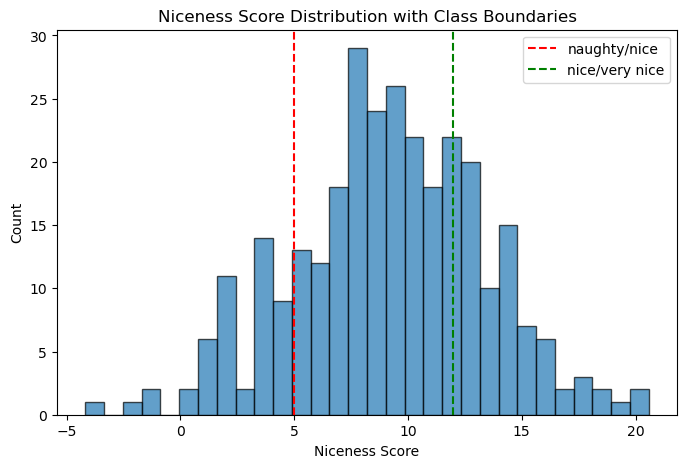

In [10]:
plt.figure(figsize=(8,5))
plt.hist(conditions, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(5, color='red', linestyle='--', label='naughty/nice')
plt.axvline(12, color='green', linestyle='--', label='nice/very nice')

plt.title("Niceness Score Distribution with Class Boundaries")
plt.xlabel("Niceness Score")
plt.ylabel("Count")
plt.legend()
plt.show()


### Q: Is it obvious that there are 3 underlying populations by eye?

### A:
Not really because the distribution looks pretty smooth. I don't see defined categories, they kind of blend in in the plot. 

Let's try training another `LogisticRegression` model.

### Q: Fill in the code below to train and test a `LogisticRegression` model

In [11]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# train the model 
multi = LogisticRegression(max_iter=500)
multi.fit(X_train, y_train)

# test the model 
y_pred = multi.predict(X_test)

# print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", multi.coef_)



Accuracy: 0.8933333333333333
Coefficients: [[-1.32188443  1.29680423 -0.65759424 -2.88079351]
 [-0.04007987  0.04985126  0.02010345 -0.45708409]
 [ 1.36196429 -1.34665549  0.63749079  3.33787759]]


### Q: Why do we have 12 coefficient estimates here?

### A:
With 3 classes and 4 features, that gives 3×4=12 weights here.

### Q: Do you think the model learned the underlying behavior? Why or why not?

### A:
The accuracy is 89, it could go higher, but the model learned some things, but not the max amount that it could, becaue 89 the accuracy.

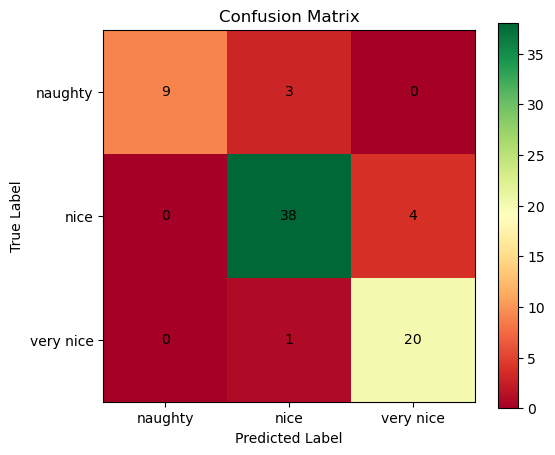

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='RdYlGn')
plt.colorbar()

# add numbers on cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')


str_labels = [class2label[c] for c in range(3)]
plt.xticks(range(3), str_labels)
plt.yticks(range(3), str_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Q: What do you notice about the confusion matrix?

### A:
The model prediction some naughty people as nice and very nice people as nice. The model assigns more people to the nice category.

### Q: What about this dataset is causing this confusion matrix to be misleading?

### A:
The skewed data that most people are nice makes it look like the model is doing really good but really its labeling everyone as nice too much.